# Random Forest Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('../../Datasets/insurance.csv')
dataset = dataset.drop(columns=['bmi', 'children'])
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset

,age,sex,smoker,region,charges
0,19,female,yes,southwest,16884.92400
1,18,male,no,southeast,1725.55230
2,28,male,no,southeast,4449.46200
3,33,male,no,northwest,21984.47061
4,32,male,no,northwest,3866.85520
...,...,...,...,...,...
1333,50,male,no,northwest,10600.54830
1334,18,female,no,northeast,2205.98080
1335,18,female,no,southeast,1629.83350
1336,21,female,no,southwest,2007.94500


In [3]:
# One hot encoding: turn string column into 3 different columns (countries), for 3 different categories
# Bindary vector: each country to a certain order of the columns

# Coding independent variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Create object of the column transformer class
# [0] is the index of column to apply OneHotEncoding
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,3])], remainder='passthrough')

# Apply the transform method to change the column X
X = np.array(ct.fit_transform(X))

print(X)

[[1.0 0.0 0.0 ... 0.0 1.0 19]
 [0.0 1.0 1.0 ... 1.0 0.0 18]
 [0.0 1.0 1.0 ... 1.0 0.0 28]
 ...
 [1.0 0.0 1.0 ... 1.0 0.0 18]
 [1.0 0.0 1.0 ... 0.0 1.0 21]
 [1.0 0.0 0.0 ... 0.0 0.0 61]]


## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Random Forest Regression model on the whole dataset

In [5]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 89, random_state = 46)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=89, random_state=46)

## Predicting the Test set results

In [6]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 9920.09  9724.53]
 [ 8686.61  8547.69]
 [27266.98 45702.02]
 [13975.64 12950.07]
 [10793.78  9644.25]
 [11753.63  4500.34]
 [ 4211.99  2198.19]
 [10793.78 11436.74]
 [ 6669.33  7537.16]
 [ 4173.05  5425.02]
 [ 5786.51  6753.04]
 [11746.71 10493.95]
 [ 8270.22  7337.75]
 [ 4843.09  4185.1 ]
 [17433.56 18310.74]
 [ 9594.83 10702.64]
 [13886.38 12523.6 ]
 [ 3894.22  3490.55]
 [ 6106.13  6457.84]
 [22230.25 33475.82]
 [39473.42 23967.38]
 [11659.62 12643.38]
 [10782.28 23045.57]
 [35228.39 23065.42]
 [ 2459.91  1674.63]
 [ 5335.48  4667.61]
 [11125.35  3732.63]
 [ 7392.34  7682.67]
 [ 4279.75  3756.62]
 [ 9362.74  8413.46]
 [19978.72  8059.68]
 [45157.34 48970.25]
 [14603.87 12979.36]
 [12343.21 20630.28]
 [29947.27 14571.89]
 [ 4617.72  4137.52]
 [ 8389.59  8347.16]
 [35333.7  51194.56]
 [23146.6  40003.33]
 [ 3193.86  1880.49]
 [ 6534.39  5458.05]
 [ 4897.33  2867.12]
 [26424.96 20149.32]
 [37285.13 47496.49]
 [29910.93 36149.48]
 [ 2949.88 26018.95]
 [ 9594.83 19749.38]
 [ 6626.09  6

## Evaluating the Model Performance

In [7]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6951639983444933

        Gini-importance
age            0.015865
sex            0.015788
smoker         0.358373
region         0.303772


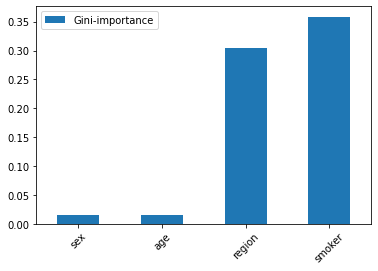

In [8]:
feats = {} # a dict to hold feature_name: feature_importance
feat_dataset = pd.DataFrame(dataset.iloc[:, :-1])

for feature, importance in zip(feat_dataset.columns, regressor.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)
print(importances)

In [9]:
# import seaborn as sns
# sns.heatmap(dataset.corr(),cmap='magma')

In [10]:
# Apply k-fold cross validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 61.40 %
Standard Deviation: 6.70 %


In [ ]:
# Apply Grid Search to find best model and parameters

number_est = range(85, 95)
rand_state = range(44, 55)
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': number_est, 'random_state': rand_state},
              ]
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

# Model without top two features

In [ ]:
# def predict():
#     user_inputs = []
#     age = float(input("How old are you? "))
#     user_inputs.append(age)
#     gender = input("What is your gender? (male/female)").lower()
#     user_inputs.append(gender)
#     bmi = input("What is your bmi?")
#     user_inputs.append(bmi)
#     children = input("How many children are covered under your plan?")
#     user_inputs.append(children)
#     smoker = input("Do you smoke? (yes/no)")
#     user_inputs.append(smoker)
#     region = input("What region of the US do you currently live in?")
#     user_inputs.append(region)
    
#     predicted_value = regressor.predict(ct.transform([user_inputs]))
    
#     print(f'''The predicted value for the inputs: 
#           age: {user_inputs[0]} 
#           gender: {user_inputs[1]}
#           bmi: {user_inputs[2]}
#           number of children: {user_inputs[3]}
#           smoker: {user_inputs[4]}
#           region: {user_inputs[5]}
#           is: ${predicted_value[0]}''')

# predict()